# 02- TensorFlow Estimator API

## 1- Regression Example

First of all, we import our ML libraries

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

As before, we create our data sample: y = 0.5*x + 5 + noise

Remember this is just an example

In [57]:
x_data = np.linspace(0.0,10,1000000)
noise = np.random.randn(len(x_data))

y_true = (0.5 * x_data) + 5 + noise

x_df = pd.DataFrame(data=x_data,columns=['X data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

my_data = pd.concat([x_df,y_df],axis=1)

Now we have to create our feature columns for the estimator

In [3]:
feat_cols = [ tf.feature_column.numeric_column('x',shape=[1]) ]

In [4]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmptze5u2lq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1f9c16f278>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Don't bother about that warnings, it's just information

Now let's create our Model with sklearn and make the split of 30% for testing and 70% for training

In [5]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

Now we are going to see some values of our train models and evaluate models, as well as its shape

In [10]:
print(x_train)
print(x_train.shape)

[ 6.83743684  5.66519567  3.97899398 ...,  4.76497476  2.14539215
  1.76991177]
(700000,)


In [11]:
print(x_eval)
print(x_eval.shape)

[ 1.80580181  2.0977321   8.20631821 ...,  6.52283652  9.97530998
  3.97208397]
(300000,)


As you see it makes sense, 30% for evaluation and 70% for training

We need to setup our estimator inputs. The estimator function acts like the feed dictionary and batch size

In [12]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

Now we need to create more input functions for our test data and train data

Shuffle is false because this function is going to be used in order to evaluate against the test data

In [13]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [17]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

We need to train our estimator

In [18]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmptze5u2lq/model.ckpt.
INFO:tensorflow:loss = 474.094, step = 1
INFO:tensorflow:global_step/sec: 477.512
INFO:tensorflow:loss = 15.7293, step = 101 (0.218 sec)
INFO:tensorflow:global_step/sec: 571.167
INFO:tensorflow:loss = 36.3777, step = 201 (0.168 sec)
INFO:tensorflow:global_step/sec: 534.144
INFO:tensorflow:loss = 26.503, step = 301 (0.189 sec)
INFO:tensorflow:global_step/sec: 604.972
INFO:tensorflow:loss = 14.8078, step = 401 (0.165 sec)
INFO:tensorflow:global_step/sec: 290.543
INFO:tensorflow:loss = 7.04009, step = 501 (0.354 sec)
INFO:tensorflow:global_step/sec: 416.346
INFO:tensorflow:loss = 13.5732, step = 601 (0.234 sec)
INFO:tensorflow:global_step/sec: 444.444
INFO:tensorflow:loss = 7.81547, step = 701 (0.219 sec)
INFO:tensorflow:global_step/sec: 499.998
INFO:tensorflow:loss = 9.39688, step = 801 (0.203 sec)
INFO:tensorflow:global_step/sec: 587.436
INFO:tensorflow:loss = 8.45447, 

Here we can see some information related to the training

After that, we need to get some sort of evaluation metrics for our train model, and the Estimator API also have nice methods to do that

In [20]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-07-04-12:47:55
INFO:tensorflow:Restoring parameters from /tmp/tmptze5u2lq/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-07-04-12:47:57
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.06919, global_step = 1000, loss = 8.55349


Also, we need to get the evaluation metrics of the test model

In [22]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-07-04-12:50:26
INFO:tensorflow:Restoring parameters from /tmp/tmptze5u2lq/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-07-04-12:50:28
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.06054, global_step = 1000, loss = 8.48432


Now we are going to compare the results of the evaluation of our train data and test data

This is a good way of checking if your model is overfitting to your training data. 

A good indicator of your model being overfit to your training data is when you have very low loss on training data buy very high loss in your eval data

In [26]:
print('TRAINING DATA METRICS')
print(train_metrics)
print('\n')
print('EVAL METRICS')
print(eval_metrics)

TRAINING DATA METRICS
{'average_loss': 1.0691862, 'loss': 8.5534897, 'global_step': 1000}


EVAL METRICS
{'average_loss': 1.0605396, 'loss': 8.4843168, 'global_step': 1000}


Then, we want them to be as close as possible to each other and hopefully both of them are low

If both loss are very close to each other, then probably the model is not being overfit to your training data

The loss is the same as the error of previous examples

The question is, how do I predict new values?

We start getting data that our model has never seen before

In [27]:
brand_new_data = np.linspace(0,10,10)

In [28]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [53]:
estimator.predict(input_fn=input_fn_predict)

<generator object Estimator.predict at 0x7f1f99f03308>

In order to visualize this data, we have to cast it to a list. Then we plot it to see how it looks like

In [54]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /tmp/tmptze5u2lq/model.ckpt-1000


[{'predictions': array([ 4.45525694], dtype=float32)},
 {'predictions': array([ 5.10063553], dtype=float32)},
 {'predictions': array([ 5.74601364], dtype=float32)},
 {'predictions': array([ 6.39139175], dtype=float32)},
 {'predictions': array([ 7.03677082], dtype=float32)},
 {'predictions': array([ 7.68214893], dtype=float32)},
 {'predictions': array([ 8.32752705], dtype=float32)},
 {'predictions': array([ 8.97290611], dtype=float32)},
 {'predictions': array([ 9.61828423], dtype=float32)},
 {'predictions': array([ 10.26366234], dtype=float32)}]

In [55]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from /tmp/tmptze5u2lq/model.ckpt-1000


In [56]:
predictions

[array([ 4.45525694], dtype=float32),
 array([ 5.10063553], dtype=float32),
 array([ 5.74601364], dtype=float32),
 array([ 6.39139175], dtype=float32),
 array([ 7.03677082], dtype=float32),
 array([ 7.68214893], dtype=float32),
 array([ 8.32752705], dtype=float32),
 array([ 8.97290611], dtype=float32),
 array([ 9.61828423], dtype=float32),
 array([ 10.26366234], dtype=float32)]

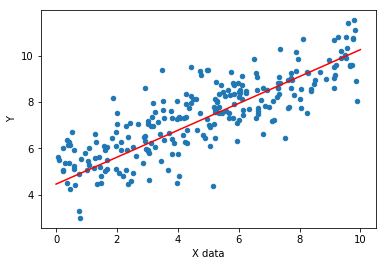

In [63]:
my_data.sample(250).plot(kind='scatter',x='X data',y='Y')
plt.plot(brand_new_data,predictions,'red')

Here we can see we have kind of the same prediction line we got the last time

## 2- Classification Example

As always, we first import our ML libraries

In [27]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Now we need to import the CSV in the same folder of this notebook and we visualize it

In [13]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [14]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


We have various features and we want to predict the 'Class' feature. This is a binary classification problem

The first step is always to clean up the data and that's exactly what we gonna do: normalize our data

In [15]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

We remove "Class" because that's the feature we want to predict, the "Group" because it's a string and the "Age" because we are going to play with it

We can normalize the data with pandas or with sklearn preprocessing

In [16]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [17]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

Let's see the columns normalized!

In [18]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


Now we have to pass our continuous feature columns. All except the 3 last columns are continuous features

We could considere age also as a continous feature

If you got a very large amount of feature columns, you probably would like to loop through the dataset for example

In [19]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
gluc_conc = tf.feature_column.numeric_column('Glucose_concentration')
blood_pres = tf.feature_column.numeric_column('Blood_pressure')
tric = tf.feature_column.numeric_column('Triceps')
ins = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
ped = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

Now we have the categorical values, we need the non categorical values

You can use a vocabulary list or a hash bucket

In [25]:
assigned_group_voclist = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

However, the vocabulary list is only when you know how to categorize your data. But you don't always have the most convenient values for that

Also you don't want to write lots and lots of different categories, for example countries of the world

In [24]:
assigned_group_hashbu = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

With this, tensorflow makes automatic categories in the background, based on the size of the hash bucket, which is perfect!

Althrough we are using the age as a categorical column, we didn't normalize it and that's because we are going to convert it to a categorical column

Sometimes you get more data doing it this way, and that is called feature engineering

But first let's plot our data

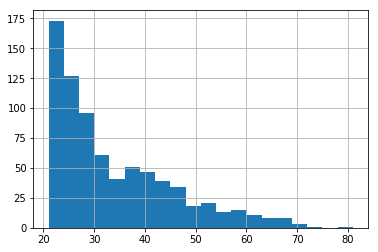

In [29]:
diabetes['Age'].hist(bins=20)

So also I could categorize by Age. Instead of using this variable as continuous I could bucket this together

In [30]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

Now we grab all of our features and make a list with them

Then it's time to perform a train test split

In [31]:
feat_cols = [num_preg,gluc_conc,blood_pres,tric,ins,bmi,ped,assigned_group_hashbu,age_bucket]

We drop the class from our data

In [34]:
x_data = diabetes.drop('Class',axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


We create a label with our class

In [36]:
labels = diabetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

And now we perform the train test split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

Now we should create an input function and our model

In [39]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [40]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmph9p6lyu5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6d30080a90>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


We train our model

In [41]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmph9p6lyu5/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 363.526
INFO:tensorflow:loss = 5.70945, step = 101 (0.278 sec)
INFO:tensorflow:global_step/sec: 539.186
INFO:tensorflow:loss = 2.68404, step = 201 (0.192 sec)
INFO:tensorflow:global_step/sec: 480.969
INFO:tensorflow:loss = 5.13777, step = 301 (0.203 sec)
INFO:tensorflow:global_step/sec: 374.545
INFO:tensorflow:loss = 6.17193, step = 401 (0.268 sec)
INFO:tensorflow:global_step/sec: 427.14
INFO:tensorflow:loss = 4.01439, step = 501 (0.233 sec)
INFO:tensorflow:global_step/sec: 347.301
INFO:tensorflow:loss = 5.86069, step = 601 (0.287 sec)
INFO:tensorflow:global_step/sec: 500.325
INFO:tensorflow:loss = 3.1915, step = 701 (0.204 sec)
INFO:tensorflow:global_step/sec: 521.824
INFO:tensorflow:loss = 4.122, step = 801 (0.189 sec)
INFO:tensorflow:global_step/sec: 551.367
INFO:tensorflow:loss = 5.71747, ste

Now it's time to evaluate our model!

Remember to set shuffle to false in order to evaluate in the same order

In [43]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [44]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-07-04-19:57:53
INFO:tensorflow:Restoring parameters from /tmp/tmph9p6lyu5/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-07-04-19:57:54
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.744589, accuracy_baseline = 0.649351, auc = 0.805432, auc_precision_recall = 0.646666, average_loss = 0.52869, global_step = 1000, label/mean = 0.350649, loss = 5.08864, prediction/mean = 0.402147


In [46]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80543214,
 'auc_precision_recall': 0.64666599,
 'average_loss': 0.52868998,
 'label/mean': 0.35064936,
 'loss': 5.0886412,
 'prediction/mean': 0.40214679,
 'global_step': 1000}

Here we can see the results of our training, with 74% of accuracy which is not bad

So let's try some predictions after this. 

Since you don't have prepared any new data, let's pass the test data again, but this time we won't pass the "y" value because we want to predict something

In [47]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [61]:
predictions = model.predict(pred_input_func)

In [62]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Restoring parameters from /tmp/tmph9p6lyu5/model.ckpt-1000


[{'logits': array([ 0.20641041], dtype=float32),
  'logistic': array([ 0.55142015], dtype=float32),
  'probabilities': array([ 0.44857982,  0.55142015], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([ 0.78773415], dtype=float32),
  'logistic': array([ 0.68734461], dtype=float32),
  'probabilities': array([ 0.31265539,  0.68734461], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.38361716], dtype=float32),
  'logistic': array([ 0.40525478], dtype=float32),
  'probabilities': array([ 0.59474522,  0.40525478], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.43974674], dtype=float32),
  'logistic': array([ 0.39180133], dtype=float32),
  'probabilities': array([ 0.60819864,  0.3918013 ], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.50341845], dtype=float

## 3- Dense Neural Network Classifier

We create a DNN model, hidden_units means the number of neurons per layer

In [63]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqk1j6n6m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6d169a4438>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


But in this case, we have to pass an embedding column or indicator column. That's because we get trouble with the categorical columns we are using

We need to pass our assigned_group and the dimension of the category class, which in this case we defined as 10

In [65]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group_hashbu,dimension=10)

Once we do that, we have to reset our feature columns. We do just as before, but now using the embedded group

In [66]:
feat_cols = [num_preg,gluc_conc,blood_pres,tric,ins,bmi,ped,embedded_group_col,age_bucket]

So let's try it again. Let's create first our input functions and the model again just to practice and complete the example

In [67]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [68]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmprx__3ppa', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6d169a4b38>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Let's train it now!

In [69]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmprx__3ppa/model.ckpt.
INFO:tensorflow:loss = 6.87463, step = 1
INFO:tensorflow:global_step/sec: 343.12
INFO:tensorflow:loss = 3.79888, step = 101 (0.290 sec)
INFO:tensorflow:global_step/sec: 445.593
INFO:tensorflow:loss = 3.54434, step = 201 (0.223 sec)
INFO:tensorflow:global_step/sec: 428.912
INFO:tensorflow:loss = 4.13723, step = 301 (0.235 sec)
INFO:tensorflow:global_step/sec: 472.988
INFO:tensorflow:loss = 6.02896, step = 401 (0.215 sec)
INFO:tensorflow:global_step/sec: 392.278
INFO:tensorflow:loss = 5.15259, step = 501 (0.252 sec)
INFO:tensorflow:global_step/sec: 469.725
INFO:tensorflow:loss = 4.01985, step = 601 (0.209 sec)
INFO:tensorflow:global_step/sec: 468.781
INFO:tensorflow:loss = 4.24376, step = 701 (0.215 sec)
INFO:tensorflow:global_step/sec: 468.235
INFO:tensorflow:loss = 7.3001, step = 801 (0.213 sec)
INFO:tensorflow:global_step/sec: 538.109
INFO:tensorflow:loss = 3.34707, s

Let's evaluate it!

In [71]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [72]:
dnn_model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-07-04-20:21:15
INFO:tensorflow:Restoring parameters from /tmp/tmprx__3ppa/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-07-04-20:21:15
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.757576, accuracy_baseline = 0.649351, auc = 0.82963, auc_precision_recall = 0.69006, average_loss = 0.482896, global_step = 1000, label/mean = 0.350649, loss = 4.64787, prediction/mean = 0.339566


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8296296,
 'auc_precision_recall': 0.69005978,
 'average_loss': 0.48289588,
 'label/mean': 0.35064936,
 'loss': 4.6478729,
 'prediction/mean': 0.33956623,
 'global_step': 1000}

As we can see it's performing a little better than the last time

If we try to increase the number of neurons, we maybe could increase the accuracy. But there's always a limit for the data, and maybe we can't improve it much more.

In that case, we would probably need more data